# Assigment 6: Weather Data Analysis
Author: Anna Lozenko

Get data from this [link](https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv).

Plot:

- The temperature
- The mean temperature each day
- The mean temperature for each month

In [49]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns

In [27]:
#import data from URL
#delete the first 23 rows that are not part of the data table
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"
df = pd.read_csv(url, skiprows = 23)
df.head()

C:\Users\annal\AppData\Local\Temp\ipykernel_12332\588752625.py:4: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows = 23)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


In [28]:
#check if there are any missing values in the dataframe
print(df.isnull().sum())

date     0
ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
ww       0
w        0
sun      0
vis      0
clht     0
clamt    0
dtype: int64


In [29]:
#check data types of the columns
print(df.dtypes)

date      object
ind        int64
rain      object
ind.1      int64
temp     float64
ind.2      int64
wetb     float64
dewpt    float64
vappr    float64
rhum       int64
msl       object
ind.3      int64
wdsp      object
ind.4      int64
wddir     object
ww        object
w         object
sun      float64
vis       object
clht      object
clamt     object
dtype: object


In [30]:
#convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format="%d-%b-%Y %H:%M")
print(df.dtypes)

date     datetime64[ns]
ind               int64
rain             object
ind.1             int64
temp            float64
ind.2             int64
wetb            float64
dewpt           float64
vappr           float64
rhum              int64
msl              object
ind.3             int64
wdsp             object
ind.4             int64
wddir            object
ww               object
w                object
sun             float64
vis              object
clht             object
clamt            object
dtype: object


In [31]:
#set the date column as the index
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index)
df.head()

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,0,0,0,0,25,81,0.0,35000,32,5
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0,0,0,80,81,0.0,8000,32,7
1996-07-31 10:00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,1011.2,0,0,0,0,25,82,0.0,28000,35,6
1996-07-31 11:00:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,1011.0,0,0,0,0,2,11,0.0,40000,40,6


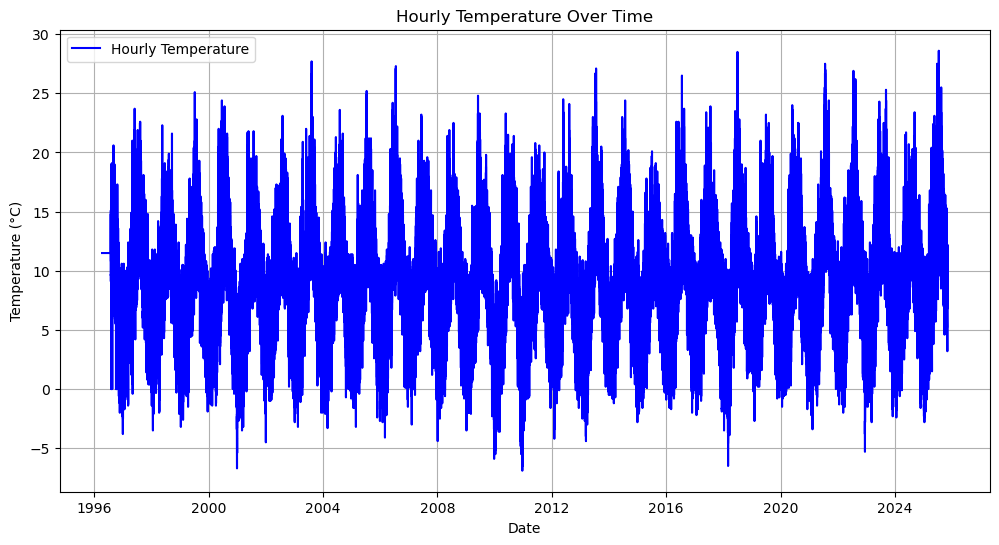

In [32]:
#plot the temperature data
plt.figure(figsize=(12,6))
plt.plot(df.index, df['temp'], color='blue', label='Hourly Temperature')
plt.title('Hourly Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()

In [45]:
df.index = pd.to_datetime(df.index)
monthly_mean = df.groupby(df.index.month)['temp'].mean()
monthly_mean

date
1      4.328953
2      4.699166
3      5.679973
4      7.597912
5     10.288042
6     12.403602
7     13.699287
8     13.615175
9     12.068245
10     9.347428
11     6.521469
12     4.816384
Name: temp, dtype: float64

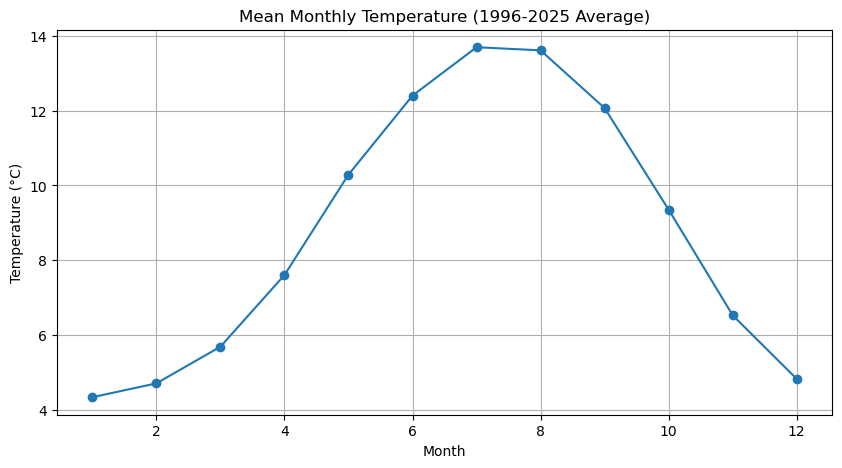

In [47]:
#plot the mean monthly temperature over the entire period (1996-2025)
plt.figure(figsize=(10,5))
plt.plot(monthly_mean.index, monthly_mean.values, marker='o')
plt.title('Mean Monthly Temperature (1996-2025 Average)')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

In [48]:
monthly_mean_by_year = df.groupby([df.index.year, df.index.month])['temp'].mean().unstack()

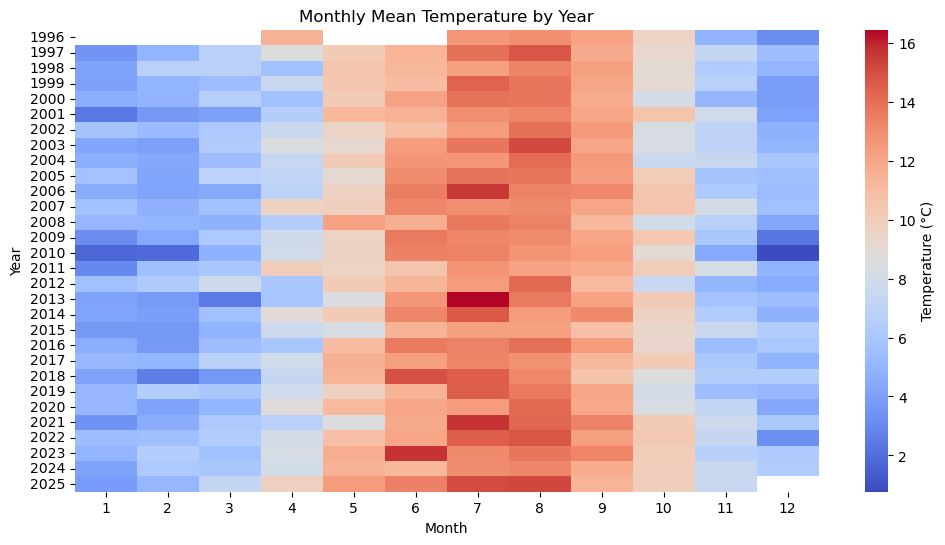

In [50]:
#plot a heatmap of the mean monthly temperature for each year for the period 1996-2025
plt.figure(figsize=(12,6))
sns.heatmap(monthly_mean_by_year, cmap='coolwarm', cbar_kws={'label': 'Temperature (°C)'})
plt.title('Monthly Mean Temperature by Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()